In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import data and manipulation.

In [50]:
name_of_file = 'checkins.dat'
path = '/content/drive/My Drive/Colab Notebooks/AI_Course/Practice_3/'+ name_of_file

#  Constriction
df = pd.read_csv(path, 
                 sep="\|\s+", 
                 skiprows=2, 
                 names=['id', 'user_id', 'venue_id', 'latitude', 'longitude', 'created_at'],
                 engine='python',
                 usecols = ['latitude','longitude'])

#  Delete NaNs
df = df.dropna(how='any')
df = df.drop(df.index[100000::])
#print(df)

Mean Shift Clustering.

In [51]:
clustering = MeanShift(bandwidth=2).fit(df)

Building a graph, where center-points of clusters are located.  

Amount of clusters: 280


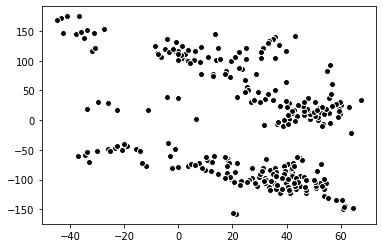

In [52]:
cluster_centers = clustering.cluster_centers_
labels = clustering.labels_
labels_unique = np.unique(labels)
n_clusters = len(labels_unique)
print('Amount of clusters:', n_clusters)
cluster_centers_x, cluster_centers_y = [i[0] for i in cluster_centers], [j[1] for j in cluster_centers]
plt.plot(cluster_centers_x, cluster_centers_y, marker='o', markerfacecolor='black', color='white')
plt.show()

Taking the hugest clusters (20 clusters).

In [53]:
clusters = {}
n = 0
for item in labels:
  if item in clusters:
    clusters[item].append(df.iloc[n])
  else:
    clusters[item] = [df.iloc[n]]
  n += 1

In [54]:
top = []
label = []
for item in clusters:
  top.append(len(clusters[item]))
  label.append(item)
df1 = pd.DataFrame(list(zip(label, top)), columns=['Name', 'val'])
df1 = df1.sort_values(by=['val'], ascending=False)[:20]
#print(df1)

    Name    val
5      0  18477
4      1  13728
7      2   8337
9      3   7225
11     5   6434
0      4   5241
31     6   3599
2      8   3357
6      7   3315
20     9   2937
1     10   2889
27    11   2128
17    12   2089
38    15   1748
19    17   1574
14    13   1476
8     16   1459
13    14   1362
16    18   1041
42    19    915


Output: coordinates of the best places.

In [56]:
for cl_ind in df1.loc[::].to_numpy():
  print(*cluster_centers[cl_ind[0]])

40.681920408459604 -74.07586740317208
33.41363611893628 -111.90142392871027
33.72097813430155 -117.90010214898203
37.707154452241916 -122.22123664005223
42.1125091495884 -87.7908053590057
39.217234353500885 -76.51755688988501
27.369749313121808 -81.18147029793089
47.101925006610024 -122.40051710500015
42.27098237711761 -71.37784045408098
31.861722258716544 -97.194857508924
33.82489879874438 -84.36921052235861
41.47732014705027 -82.76887007752364
44.93181985596971 -93.24952366022477
39.77872937576213 -105.06815896652378
35.57573726549701 -79.82719359137415
41.972476684725436 -80.22255767791559
36.08311407312825 -115.13438104618838
39.61976220703991 -84.7919751221725
39.614052523164546 -95.09305000657781
29.817075774250377 -95.37950577680289
